### Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

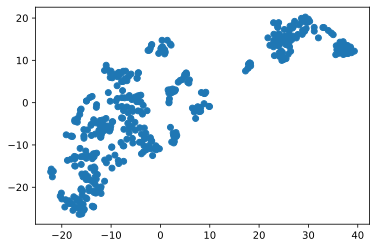

In [6]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

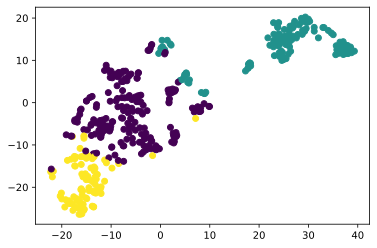

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [8]:
for n_cluster in range(max(labels_train)+1):
    crim_mean = round(X_train.loc[labels_train == n_cluster, 'CRIM'].mean(), 2)
    price_mean = round(y_train[labels_train == n_cluster].mean(), 2)
    print('\n'+f'Avg criminal activity in the cluster {n_cluster}: {crim_mean}')
    print(f'Avg house price in the cluster {n_cluster}: {price_mean}')


Avg criminal activity in the cluster 0: 0.42
Avg house price in the cluster 0: 24.96

Avg criminal activity in the cluster 1: 10.8
Avg house price in the cluster 1: 16.17

Avg criminal activity in the cluster 2: 0.07
Avg house price in the cluster 2: 27.79


### Задание 3

In [9]:
labels_test = kmeans.predict(X_test_scaled)

In [10]:
for n_cluster in range(max(labels_test)+1):
    crim_mean = round(X_test.loc[labels_test == n_cluster, 'CRIM'].mean(), 2)
    price_mean = round(y_test[labels_test == n_cluster].mean(), 2)
    print('\n'+f'Avg criminal activity in the cluster {n_cluster}: {crim_mean}')
    print(f'Avg house price in the cluster {n_cluster}: {price_mean}')


Avg criminal activity in the cluster 0: 0.27
Avg house price in the cluster 0: 21.86

Avg criminal activity in the cluster 1: 10.17
Avg house price in the cluster 1: 16.44

Avg criminal activity in the cluster 2: 0.06
Avg house price in the cluster 2: 31.35
